In [336]:
import pandas as pd

In [337]:
data = pd.read_csv('data_processed.csv')
data

,Unnamed: 0,drummer,session,id,style,simplified_style,bpm,beat_type,time_signature,midi_filename,...,rock,rockabilly,samba,sambareggae,sangueo,secondline,shuffle,slow,soft,songo
0,0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,funk,138,1,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,...,0,0,0,0,0,0,0,0,0,0
1,1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,funk,102,1,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,...,0,0,0,0,0,0,0,0,0,0
2,2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,funk,105,1,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,...,0,0,0,0,0,0,0,0,0,0
3,3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,funk,86,1,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,...,0,0,0,0,0,0,0,0,0,0
4,4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,funk,80,1,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1085,drummer9,drummer9/session1,drummer9/session1/5,rock,rock,100,1,4-4,drummer9/session1/5_rock_100_beat_4-4.mid,...,1,0,0,0,0,0,0,0,0,0
1086,1086,drummer9,drummer9/session1,drummer9/session1/6,rock,rock,100,1,4-4,drummer9/session1/6_rock_100_beat_4-4.mid,...,1,0,0,0,0,0,0,0,0,0
1087,1087,drummer9,drummer9/session1,drummer9/session1/7,rock,rock,100,1,4-4,drummer9/session1/7_rock_100_beat_4-4.mid,...,1,0,0,0,0,0,0,0,0,0
1088,1088,drummer9,drummer9/session1,drummer9/session1/8,rock,rock,100,1,4-4,drummer9/session1/8_rock_100_beat_4-4.mid,...,1,0,0,0,0,0,0,0,0,0


In [338]:
groove_mask = (
    (data['groove1'] == 1) | 
    (data['groove2'] == 1) | 
    (data['groove3'] == 1) | 
    (data['groove4'] == 1) | 
    (data['groove5'] == 1) | 
    (data['groove6'] == 1) | 
    (data['groove7'] == 1) | 
    (data['groove8'] == 1) | 
    (data['groove9'] == 1) | 
    (data['groove10'] == 1)
)
data.loc[groove_mask, ['style', 'drummer']]

,style,drummer
0,funk/groove1,drummer1
1,soul/groove10,drummer1
2,funk/groove2,drummer1
3,soul/groove3,drummer1
4,soul/groove4,drummer1
5,funk/groove5,drummer1
6,hiphop/groove6,drummer1
7,pop/groove7,drummer1
8,rock/groove8,drummer1
9,soul/groove9,drummer1


In [339]:
data.loc[(data.reggaeton == 1) & (data.beat_type ==1), ['style', 'drummer']]

,style,drummer
255,latin/reggaeton,drummer1


In [340]:
rock = 'rock', 'punk', 'blues'
jazz = 'jazz', 'gospel', 'middleeastern'
funk = 'funk', 'soul', 'neworleans'
latin = 'latin', 'afrocuban', 'reggae', 'afrobeat'
hiphop = 'hiphop', 'breakbeat'
pop = 'pop', 'disco', 'country'

def check_style(style: str, style_list: list):
    for s in style.split('/'):
        if s in style_list:
            return True
    return False

def simplify_styles(style: str):
    if(check_style(style, pop)):
        return 'pop'
    if(check_style(style, hiphop)):
        return 'hiphop'
    if(check_style(style, jazz)):
        return 'jazz'
    if(check_style(style, latin)):
        return 'latin'
    if(check_style(style, funk)):
        return 'funk'
    if(check_style(style, rock)):
        return 'rock'
    return 'other'

data['simplified_style'] = data['style'].apply(simplify_styles)

In [341]:
def format_autopct(pct, total):
    return f"{pct:.1f}% ({int(pct/100 * total)})"

<Axes: title={'center': 'Styles distribution (beats & fills)'}, ylabel='count'>

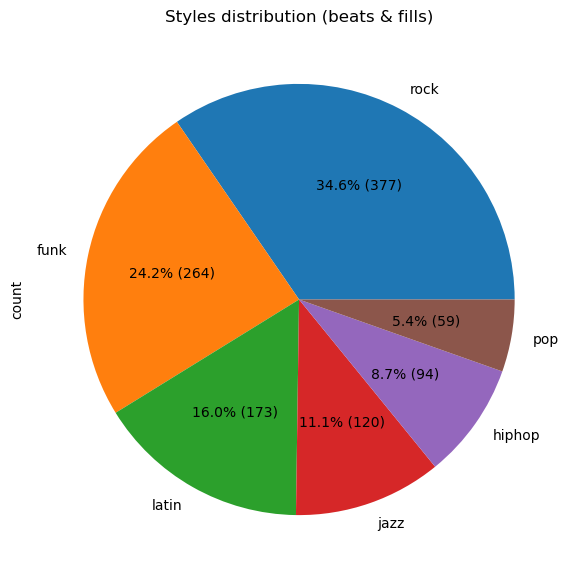

In [342]:
simplified_styles = data.simplified_style.value_counts()
simplified_styles.plot(kind='pie', figsize=(7, 7), title='Styles distribution (beats & fills)', autopct=lambda pct: format_autopct(pct, simplified_styles.sum()))

<Axes: title={'center': 'Styles distribution (beats only)'}, ylabel='count'>

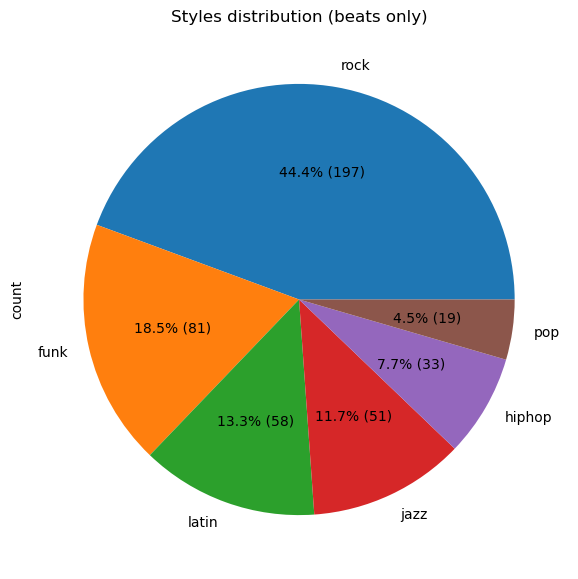

In [343]:
simplified_beats = data[data.beat_type ==1].simplified_style.value_counts()
simplified_beats.plot(kind='pie', figsize=(7, 7), title='Styles distribution (beats only)', autopct=lambda pct: format_autopct(pct, simplified_beats.sum()))

In [344]:
# Function to extract the main genres
def extract_main_genres(df, column):
    # Split the 'style' column by '/' and '-' and take the first element as the main genre
    df['main_genre'] = df[column].str.split(r'[/\-]').str[0]
    # Get the unique main genres
    main_genres = df['main_genre'].unique()
    return main_genres

# Extract the main genres from the 'style' column
main_genres = extract_main_genres(data, 'style')

# Output the main genres
print(main_genres)
print(len(main_genres))

['funk' 'soul' 'hiphop' 'pop' 'rock' 'jazz' 'neworleans' 'dance' 'latin'
 'afrocuban' 'reggae' 'country' 'gospel' 'punk' 'afrobeat' 'blues'
 'middleeastern']
17


<Axes: title={'center': 'Distribution of data by distictive genres (beats only)'}, ylabel='count'>

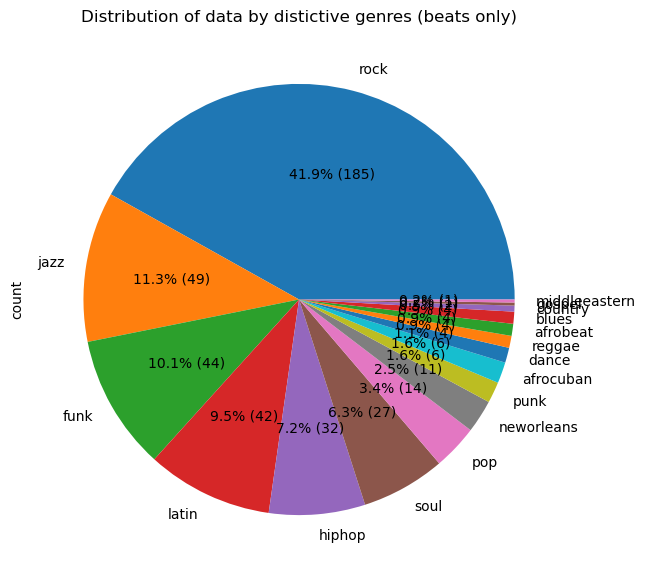

In [345]:
main_genres = data[data.beat_type == 1].main_genre.value_counts()
main_genres.plot.pie(figsize=(7, 7), title='Distribution of data by distictive genres (beats only)', autopct=lambda pct: format_autopct(pct, main_genres.sum()))

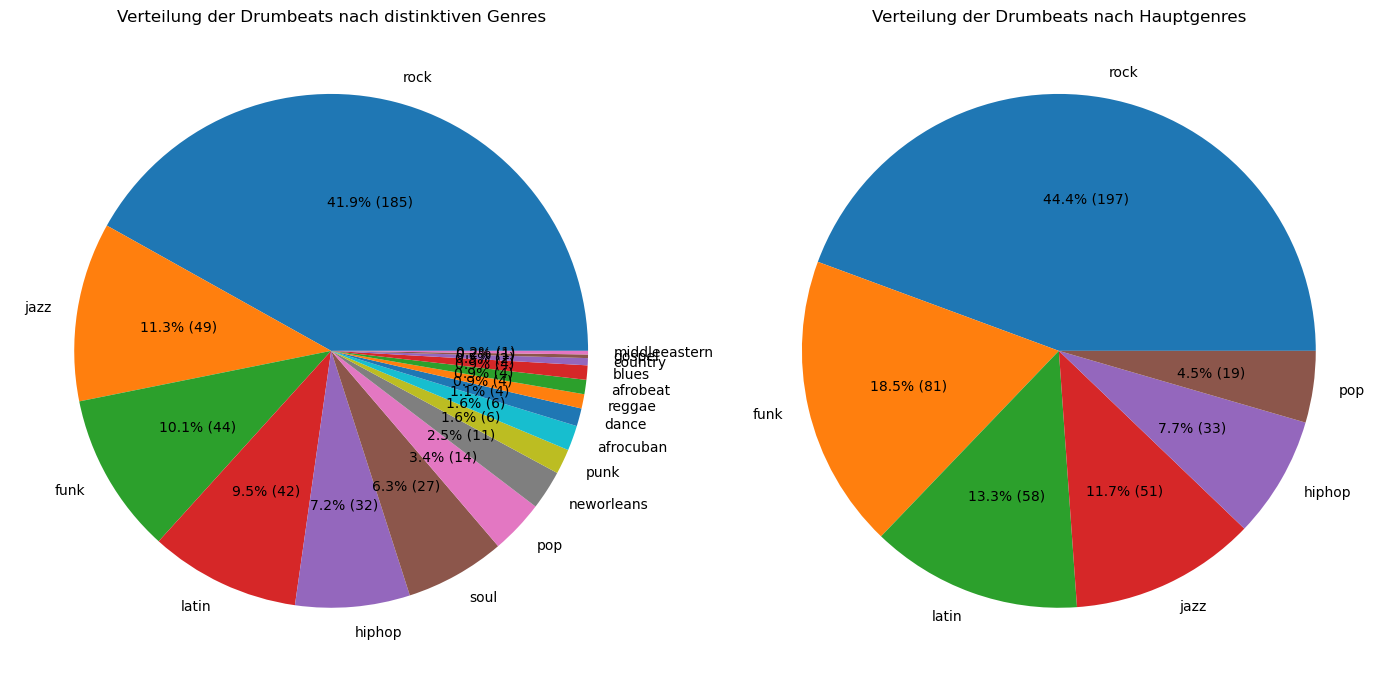

In [346]:

# Filter and get value counts for 'main_genre' and 'simplified_style'
main_genres = data[data.beat_type == 1].main_genre.value_counts()
simplified_beats = data[data.beat_type == 1].simplified_style.value_counts()

# Create the subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot the first pie chart for main genres
main_genres.plot.pie(
    ax=axes[0],  # First subplot
    title='Verteilung der Drumbeats nach distinktiven Genres',
    autopct=lambda pct: format_autopct(pct, main_genres.sum()),
    ylabel='',
)

# Plot the second pie chart for simplified styles
simplified_beats.plot.pie(
    ax=axes[1],  # Second subplot
    title='Verteilung der Drumbeats nach Hauptgenres',
    autopct=lambda pct: format_autopct(pct, simplified_beats.sum()),
    ylabel='',
)

# Adjust layout so titles and labels don't overlap
plt.tight_layout()

# Show the combined plot
plt.show()

In [347]:
columns = [
 'drummer',
 'session',
 'id',
 'style',
 'simplified_style',
 'bpm',
 'beat_type',
 'time_signature',
 'midi_filename',
 'audio_filename',
 'duration',
 'split',
 'onset_env_mean',
 'onset_env_std',
 'mfcc_mean',
 'mfcc_std',
 'spectral_flux_mean',
 'spectral_flux_std',
 'spectral_contrast_mean',
 'spectral_contrast_std',
 'tonnetz_mean',
 'tonnetz_std',
 'rms_mean',
 'rms_std',
 'spectral_centroid_mean',
 'spectral_centroid_std',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_std',
 'spectral_flatness_mean',
 'spectral_flatness_std',
 'tempogram_mean',
 'tempogram_std']

In [348]:
data = data[columns]
data

,drummer,session,id,style,simplified_style,bpm,beat_type,time_signature,midi_filename,audio_filename,...,rms_mean,rms_std,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_mean,spectral_bandwidth_std,spectral_flatness_mean,spectral_flatness_std,tempogram_mean,tempogram_std
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,funk,138,1,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,...,0.034636,0.058105,5335.603726,2688.930490,4615.955290,1007.859698,0.092827,0.133516,0.239535,0.137067
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,funk,102,1,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,...,0.030456,0.063953,6338.191486,3683.342441,4989.509117,1157.665970,0.142638,0.155706,0.139604,0.163539
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,funk,105,1,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,...,0.037484,0.067771,6077.338238,3792.722720,4680.404598,1377.311199,0.124579,0.146646,0.179192,0.130047
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,funk,86,1,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,...,0.022330,0.049949,5542.225095,3417.495525,4875.089779,1265.250954,0.106046,0.138443,0.208746,0.174764
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,funk,80,1,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,...,0.021056,0.051182,7714.574395,3887.263988,5119.254721,1091.703500,0.188627,0.157474,0.129188,0.149107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,drummer9,drummer9/session1,drummer9/session1/5,rock,rock,100,1,4-4,drummer9/session1/5_rock_100_beat_4-4.mid,drummer9/session1/5_rock_100_beat_4-4.wav,...,0.017097,0.026517,4798.587353,2262.243523,4202.586394,1143.580021,0.054484,0.086355,0.244154,0.158753
1086,drummer9,drummer9/session1,drummer9/session1/6,rock,rock,100,1,4-4,drummer9/session1/6_rock_100_beat_4-4.mid,drummer9/session1/6_rock_100_beat_4-4.wav,...,0.010296,0.022294,5685.170684,1819.749391,4524.244019,929.885425,0.071707,0.090014,0.169466,0.136667
1087,drummer9,drummer9/session1,drummer9/session1/7,rock,rock,100,1,4-4,drummer9/session1/7_rock_100_beat_4-4.mid,drummer9/session1/7_rock_100_beat_4-4.wav,...,0.018970,0.029546,7167.742409,3295.887907,5292.859346,1174.628306,0.148190,0.145533,0.206317,0.176834
1088,drummer9,drummer9/session1,drummer9/session1/8,rock,rock,100,1,4-4,drummer9/session1/8_rock_100_beat_4-4.mid,drummer9/session1/8_rock_100_beat_4-4.wav,...,0.022295,0.030756,6522.843388,3378.381352,5077.864282,1256.245421,0.144691,0.153425,0.202719,0.160704


In [349]:
data.to_csv("data_reduced.csv")